In [49]:
# Importing Necessary Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataSet
Linkedin_data = pd.read_csv('linkedin-reviews.csv')

In [2]:

print(Linkedin_data.shape)
Linkedin_data.head()

(702, 2)


,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [3]:
Linkedin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


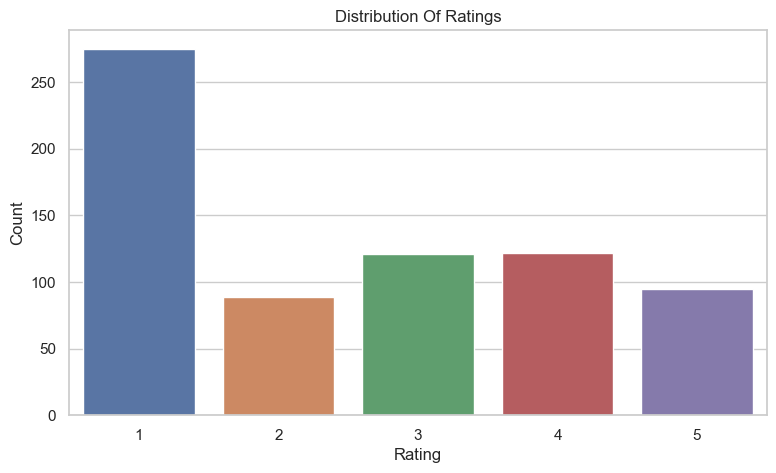

In [5]:
# distribution of ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=Linkedin_data, x='Rating')
plt.title('Distribution Of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Most OF The Reviews Are Has 1 Rating**

In [10]:
# Calculating The Length Of Each Review
Linkedin_data['Review_Length'] = Linkedin_data['Review'].apply(len)
Linkedin_data.head()

,Review,Rating,Review_Length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23
2,Slow and it tries to upload your contacts with...,1,61
3,Add ability to customize the profile and move ...,4,90
4,"Good app, but it's a pain that it's not possib...",4,133


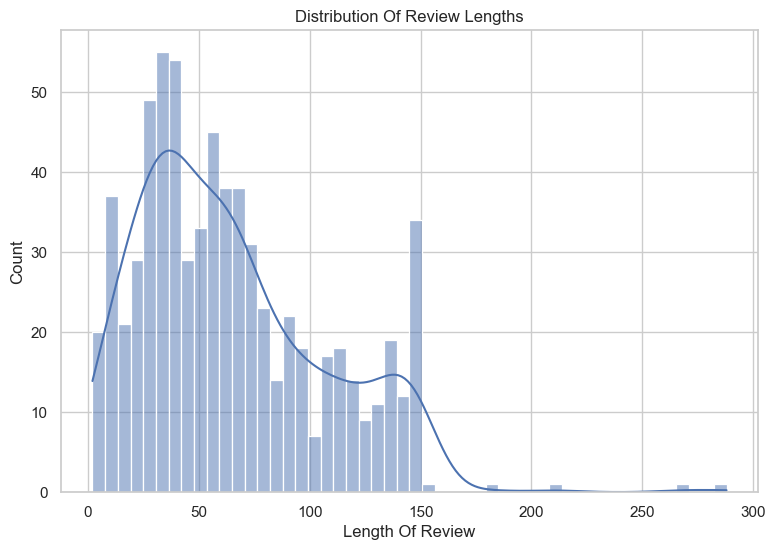

In [12]:
# Plotting The Distribution Of Review Length
plt.figure(figsize=(9,6))
sns.histplot(Linkedin_data['Review_Length'], bins=50,kde=True)
plt.title('Distribution Of Review Lengths')
plt.xlabel('Length Of Review')
plt.ylabel('Count')
plt.show()

**The vast majority of reviews are relatively short, with the highest frequency clustering around lengths between 20-80 characters, suggesting that most users prefer to provide concise, bite-sized feedback.**

In [48]:
# the next step is to label the data with sentiments. We can use NTLK for this task. NTLK provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text.
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
def ntlk_sentiment_analysis(review):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(review)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    

In [20]:
Linkedin_data['Sentiments'] = Linkedin_data['Review'].apply(ntlk_sentiment_analysis)

In [21]:
Linkedin_data.head()

,Review,Rating,Review_Length,Sentiments
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Positive
3,Add ability to customize the profile and move ...,4,90,Positive
4,"Good app, but it's a pain that it's not possib...",4,133,Negative


**The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by NTLk.**

In [24]:
# Analyzing App Review Sentiments
sentiment_distribution = Linkedin_data['Sentiments'].value_counts()

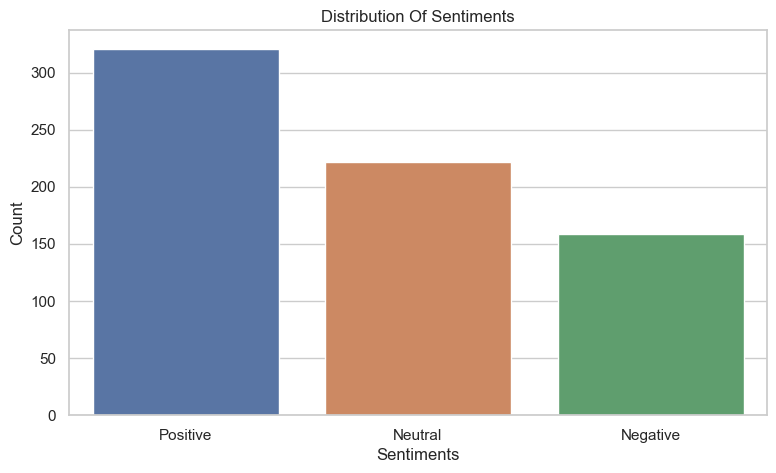

In [25]:
# Plotting The Distribution Of Sentiments
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution Of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

**So, We Can See Although The App Has Low Rating,Still The Reviewers don't usem many negative words in the reviews for the app**

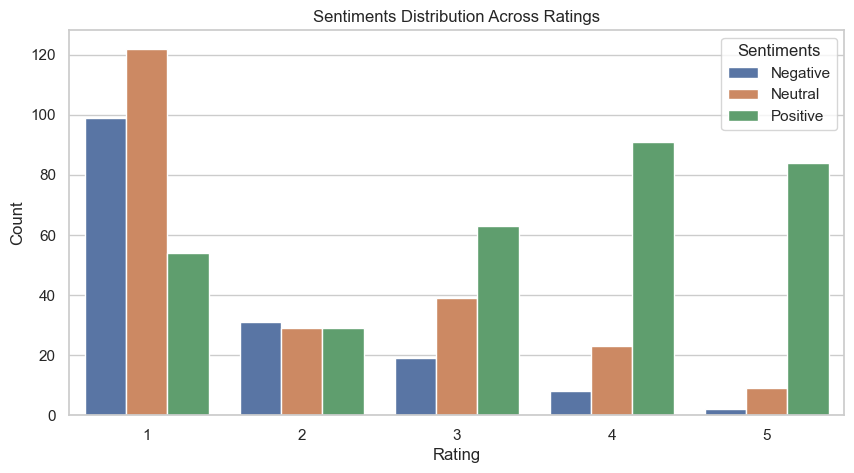

In [28]:
#  relationship between the sentiments and the ratings
plt.figure(figsize=(10,5))
sns.countplot(data=Linkedin_data,x='Rating',hue='Sentiments')
plt.title('Sentiments Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* Extremely low 1-star ratings are dominated by negative sentiment reviews, indicating high dissatisfaction.
* Very high 5-star ratings are predominantly positive in sentiment, reflecting satisfaction with the product/service.
* For mid-range ratings of 2-4 stars, there is a more balanced mix of positive, negative, and neutral sentiment reviews.

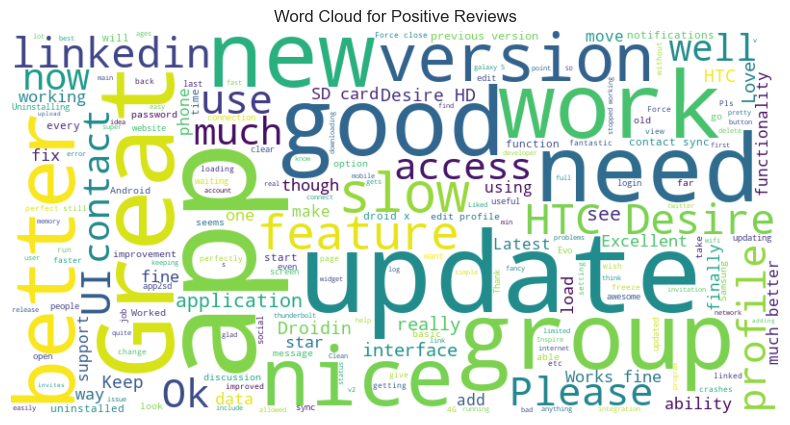

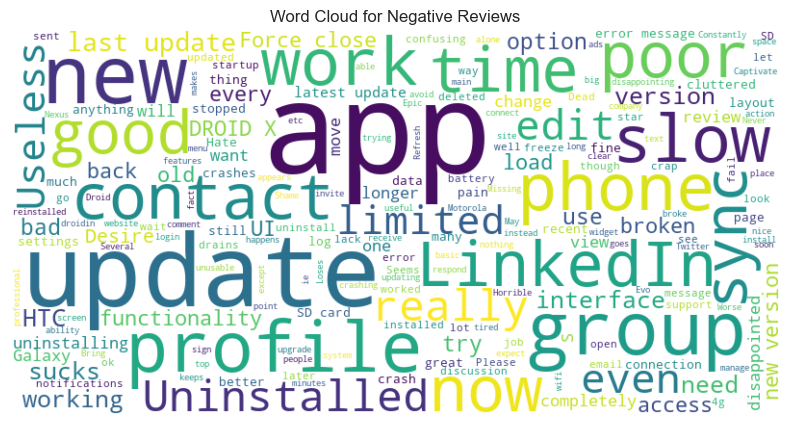

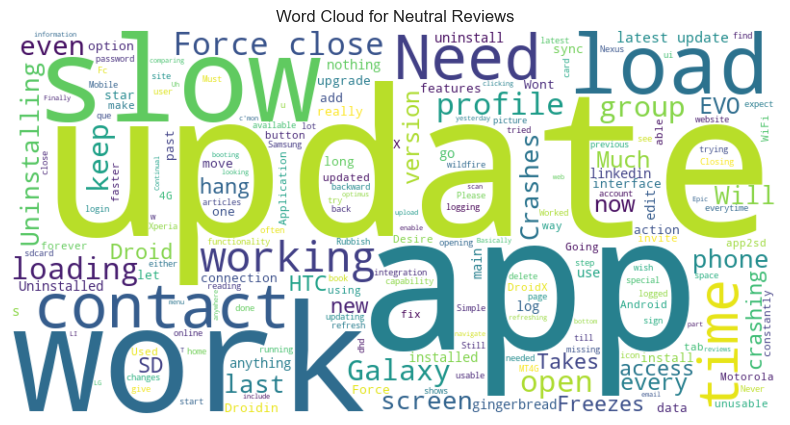

In [42]:
# perform a text analysis to identify common words or themes within each sentiment category.

from wordcloud import WordCloud

def generate_word_cloud(sentiment):
    text = ' '.join(review for review in Linkedin_data[Linkedin_data['Sentiments']==sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)


# Conclusion
Through this analysis, we gained valuable insights into user sentiments towards the LinkedIn app, identified areas of improvement, and highlighted strengths. 